This function models tolerance - at a time x after most recent cannabis dose, the effectiveness of a cannabis dose will be multiplied by the resulting factor y. The "tFactor" variable is used later - change "lastDoseTime" to see effects in later graphs.

Populating the interactive namespace from numpy and matplotlib
0.816060279414


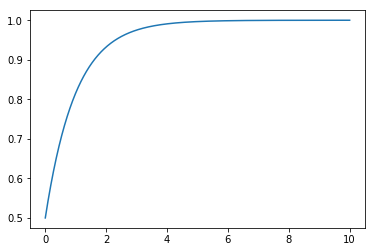

In [19]:
 %pylab inline

import pylab
import numpy as np

toleranceCoeff = 1 #factor representing how long it takes to return to baseline tolerance
minimumEffect = 0.5 #minimum effectiveness of a dose, ie effectiveness of a dose at maximum tolerance

x = np.linspace(0, 10, 1000)  # 1000 evenly-spaced values from 0 to 4
y = 1 - minimumEffect*np.exp((-1)*x*toleranceCoeff)

def toleranceLevel(timeSinceLastDose, toleranceCoeff, minimumEffect):
    return 1-minimumEffect*np.exp((-1)*timeSinceLastDose*toleranceCoeff)

##### Change This #######
lastDoseTime = 1 
#########################

tFactor = toleranceLevel(lastDoseTime, toleranceCoeff, minimumEffect)

pylab.plot(x, toleranceLevel(x, toleranceCoeff, minimumEffect))

print(tFactor)

Vasofactors - these are factors affecting vasodilation levels, which increase the rate at which THC enters the bloodstream and the brain. The resulting Vasodilation Factor ("Vasofactor") can be applied to the above blood THC level curves to modify the time course and "peak high." The degree to which various factors contribute to the V-Factor is unscientific and based on anecdotal experiences. Ideally, the vasofactor would change the shape of the curve but keep the integral the same, because the amount of THC remains the same, but I haven't made it that way yet. 

Change the values for factor times and levels to see the effects on THC curves and levels in the graphs below.

In [20]:
#Vasofactor levels can be varied by user input to different degrees and weighted based on suspected importance of the factor.
#E.g., aerobic activity probably has a much greater effect than theobromine consumption, so it could be given a higher weight.
#Zero is the baseline for the levels - i.e., no consumption of caffeine/other substances, 
#no aerobic activity, normal noise/light/temp levels.

caffeineTime = 1 #when did you last consume caffeine?
caffeineLevel = 0 #how large was caffeine dose
caffeineWeight = -1
caffeine = caffeineWeight*caffeineLevel/caffeineTime


capsaicinTime = 1
capsaicinLevel = 0
capsaicinWeight = 1
capsaicin = capsaicinWeight*capsaicinLevel/capsaicinTime


theobromineTime = 1
theobromineLevel = 0
theobromineWeight = 0.2
theobromine = theobromineWeight*theobromineLevel/theobromineTime


aerobicTime = 1
aerobicLevel = 0.4 # this factor is like intensity*duration. 0.4 could correspond to walking briskly all day, or HIT for 30-60 min.
# max heart rate = 220 - your_age. Generally speaking, lets say soccer full out, you reach 80-90%. 200*(0.8-0.9) = 160-180.  This would correspond to 1.0
aerobicWeight = 3
aerobic =  aerobicWeight*aerobicLevel/aerobicTime


currentNoiseLevel = 0
currentNoiseWeight = -0.2
currentNoise = currentNoiseWeight*currentNoiseLevel

currentLightLevel = 0
currentLightWeight = -0.2
currentLight = currentLightWeight*currentLightLevel

currentTempLevel = 0
currentTempWeight = 1
currentTemp = currentTempWeight*currentTempLevel

totalWeights = caffeineWeight + capsaicinWeight + theobromineWeight + aerobicWeight + currentNoiseWeight + currentLightWeight + currentTempWeight

totalFactors = caffeine + capsaicin + theobromine + aerobic + currentNoise + currentLight + currentTemp

baseline = 1

vasofactor = baseline + totalFactors/totalWeights

print(vasofactor)


1.31578947368


The other category of factors is those affecting the subjective perception of the "high" - these differ from vasofactors in that they do not affect the time course of blood THC levels, instead acting as simple multipliers.

In [21]:
#Subjective factors - ranges from 0.5 to 1.5.

environmentFamiliarity = 1 #How often have you smoked here in the past?
strainFamiliarity = 1.3 #How often have you smoked this strain?
methodFamiliarity = 1 #How often to you consume cannabis by current method?
socialFamiliarity = 1 #How often do you consumer cannabis in current company?

subjectiveFactor = environmentFamiliarity*strainFamiliarity*methodFamiliarity*socialFamiliarity

print(subjectiveFactor)

1.3


These curves represent the time course of blood THC levels after administration by smoking/ingestion. The maximum of these curves would be the approximate "maximum high" experienced from the dose. 

This function is a pharmacokinetic curve representing THC levels in the bloodstream after smoking. This is based on the Hill equation - see attached pdf "Hill Equation." The Hill Equation is typically used for intravenous injections, but smoking is fairly close. 

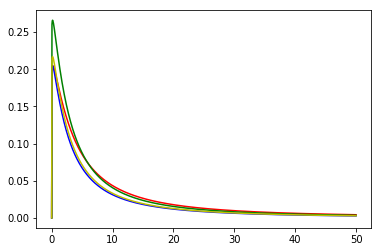

In [22]:

alpha = 1.05
c = 6
relaxTime = 1.8 #This factor affects the time it takes to return to baseline.


x = np.linspace(0, 50, 1000)  # 1000 evenly-spaced values from 0 to 4
ySmoking = (alpha*(c**alpha)*(x**(alpha-1)))/(c**alpha + x**alpha)**relaxTime
yVaso = (alpha*(c**alpha)*((x*vasofactor)**(alpha-1)))/(c**alpha + (x*vasofactor)**alpha)**relaxTime
yVasoSubj = subjectiveFactor*((alpha*(c**alpha)*((x*vasofactor)**(alpha-1)))/(c**alpha + (x*vasofactor)**alpha)**relaxTime)
yVasoSubjT = tFactor*subjectiveFactor*((alpha*(c**alpha)*((x*vasofactor)**(alpha-1)))/(c**alpha + (x*vasofactor)**alpha)**relaxTime)

pylab.plot(x, ySmoking, 'r')
pylab.plot(x, yVaso, 'b')
pylab.plot(x, yVasoSubj, 'g')
pylab.plot(x, yVasoSubjT, 'y')
pylab.show()

The time course of the effectiveness of edibles can be modeled by a flat-topped Gaussian curve. This seems like a fairly accurate representation of edible effects to me, although maybe the tail should be longer.

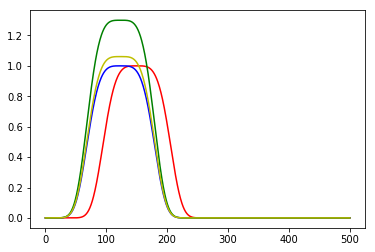

In [23]:

b = 150 #shifts curve on x axis
cGauss = 60 #widens/narrows curve
n = 4 #n>2 makes the distribution "flat-topped", greater n makes the function more "table-like"

x = np.linspace(0,500,1000)
yPureTHCGaussian = exp((-(x-b)**n)/(cGauss**n))
yVaso = exp((-(x-b + 20*vasofactor)**n)/((cGauss)**n))
yVasoSubj = subjectiveFactor*exp((-(x-b + 20*vasofactor)**n)/((cGauss)**n))
yVasoSubjT = tFactor*subjectiveFactor*exp((-(x-b + 20*vasofactor)**n)/((cGauss)**n))

pylab.plot(x, yPureTHCGaussian, 'r') #THC time course base curve
pylab.plot(x, yVaso, 'b') #THC base curve with vasofactor
pylab.plot(x, yVasoSubj, 'g') #with vasofactor and subjective factor
pylab.plot(x, yVasoSubjT, 'y') #with vasofactor, subjective factor, and tolerance factor
pylab.show()

The curve for a log-normal distribution looks a little more accurate, at least in my experience.

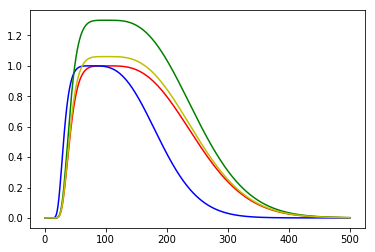

In [24]:
b = 150 #shifts curve on x axis
cGauss = 1 #widens/narrows curve
n = 4 #n>2 makes the distribution "flat-topped", greater n makes the function more "table-like"

mu = 3
stretchFactor = 5
scaleFactor = 1

x = np.linspace(1,500,1000)
yPureTHCLongTail = exp(-((np.log(x/stretchFactor)-mu)**n)/cGauss**2)/(cGauss*scaleFactor)
yVaso = exp(-((np.log(vasofactor*x/stretchFactor)-mu)**n)/cGauss**2)/(cGauss*scaleFactor)
yVasoSubj = subjectiveFactor*exp(-((np.log(x/stretchFactor)-mu)**n)/cGauss**2)/(cGauss*scaleFactor)
yVasoSubjT = tFactor*subjectiveFactor*exp(-((np.log(x/stretchFactor)-mu)**n)/cGauss**2)/(cGauss*scaleFactor)


pylab.plot(x, yPureTHCLongTail, 'r')
pylab.plot(x, yVaso, 'b')
pylab.plot(x, yVasoSubj, 'g')
pylab.plot(x, yVasoSubjT, 'y')
pylab.show()

We could also try to find a blood THC curve for an acetate product that looks appealing, looks unique, and is plausibly representative of what might happen with a THC acetate product. Since the acetate product with our current reaction procedure would be some combination of THC acetate and unchanged THC (let's say 50/50 for simplicity), a reasonable representation would be a combination of two of the above long-tailed curves, one for THC as above and an altered one for THC acetate representing the more rapid effects.

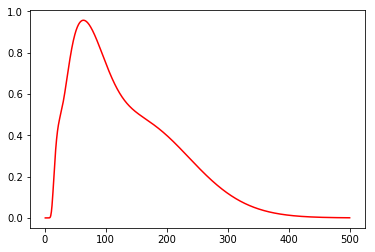

In [25]:
b = 150 #shifts curve on x axis
cGauss = 1 #widens/narrows curve
n = 4 #n>2 makes the distribution "flat-topped", greater n makes the function more "table-like"

mu = 3
stretchFactor = 5
acetateStretchFactor = 2
scaleFactor = 1

x = np.linspace(1,500,1000)
yTHC = exp(-((np.log(x/stretchFactor)-mu)**n)/cGauss**2)/(cGauss*scaleFactor)
yTHCAcetate = exp(-((np.log(x/(stretchFactor/acetateStretchFactor))-mu)**n)/cGauss**2)/(cGauss*scaleFactor)
yAcetateProduct = (yTHC + yTHCAcetate)/2
                  
#yVaso = exp(-((np.log(vasofactor*x/stretchFactor)-mu)**n)/cGauss**2)/(cGauss*scaleFactor)
#yVasoSubj = subjectiveFactor*exp(-((np.log(x/stretchFactor)-mu)**n)/cGauss**2)/(cGauss*scaleFactor)
#yVasoSubjT = tFactor*subjectiveFactor*exp(-((np.log(x/stretchFactor)-mu)**n)/cGauss**2)/(cGauss*scaleFactor)


pylab.plot(x, yAcetateProduct, 'r')
#pylab.plot(x, yVaso, 'b')
#pylab.plot(x, yVasoSubj, 'g')
#pylab.plot(x, yVasoSubjT, 'y')
pylab.show()

Shown below is a comparison of the curves for smoking (red), ingesting THC (blue), and ingesting our 50/50 THC/THC-Acetate product (green). The acetate product curve is sort of intermediate between smoking and ingesting THC, which is what we wanted to show. These curves are normalized to have the same integral, and the smoking curve is multiplied by a factor representing the proportion of THC lost to combustion during smoking.

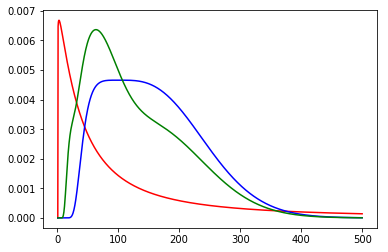

In [26]:
def normalize(ySet, x):
    return ySet/numpy.trapz(ySet, x) #numpy.trapz gives the integral

smokeLossFactor = 0.5 #represents proportion of THC dose lost to combustion when smoking.

pylab.plot(x, normalize(ySmoking, x)*smokeLossFactor, 'r')
pylab.plot(x, normalize(yPureTHCLongTail, x), 'b')
pylab.plot(x, normalize(yAcetateProduct, x), 'g')
pylab.show()

The above curves show exactly what we want - that our product would have a higher "peak high" than a typical edible, while also having a much longer duration of high than smoking. 